Mounted at /content/drive
          X          Y
0  1.000000   8.483571
1  1.473684   7.876546
2  1.947368  15.720437
3  2.421053  25.357532
4  2.894737  23.178264
PERSAMAAN REGRESI: Y = 2.7971* IPK +1.8079* IPK^2 + 0.0698 * IPK^3 + 2.5186


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


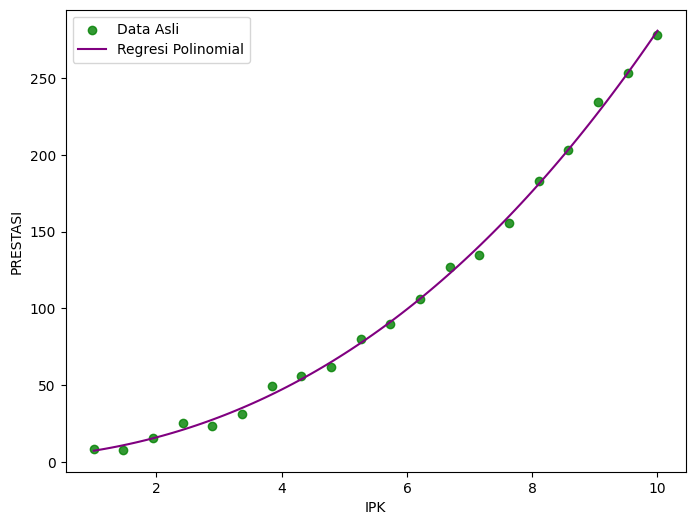

In [1]:
from re import X
from google.colab import drive
drive.mount('/content/drive')
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/content/drive/My Drive/CJ/regresi_polinomial.csv')
print(df.head())

df.columns = ["IPK","PRESTASI"]
X = df[["IPK"]]
Y = df[["PRESTASI"]]

poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit (X_poly, Y)

print (f"PERSAMAAN REGRESI: Y = {model.coef_[0][1]:.4f}* IPK +" f"{model.coef_[0][2]:.4f}* IPK^2 + {model.coef_[0][3]:.4f} * " f"IPK^3 + {model.intercept_[0]:.4f}")

X_pred = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)
X_pred_poly = poly.transform(X_pred)
y_pred = model.predict(X_pred_poly)

plt.figure(figsize=(8,6))

plt.scatter(df["IPK"], df["PRESTASI"], color='green', alpha= 0.8, label="Data Asli")

plt.plot(X_pred, y_pred, color='purple', label="Regresi Polinomial")

plt.xlabel('IPK')
plt.ylabel('PRESTASI')
# plt.grid(True)
plt.legend()

plt.show()
